TASK 3 - NUMBER RECOGNITION - KARANAM VENKATA SAI ESWAR


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd

In [10]:
train_data = pd.read_csv('/mnist_train.csv')
train_images = train_data.drop('label', axis=1).values
train_labels = train_data['label'].values
train_images = train_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_data = pd.read_csv('/mnist_test.csv')
test_images = test_data.values
test_images = test_images / 255.0

In [11]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images.reshape(-1, 784), train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
65/65 [==============================] - 1s 8ms/step - loss: 0.8921 - accuracy: 0.7599 - val_loss: nan - val_accuracy: 0.8857
Epoch 2/10
65/65 [==============================] - 0s 5ms/step - loss: 0.2998 - accuracy: 0.9159 - val_loss: nan - val_accuracy: 0.9118
Epoch 3/10
65/65 [==============================] - 0s 6ms/step - loss: 0.2314 - accuracy: 0.9370 - val_loss: nan - val_accuracy: 0.9070
Epoch 4/10
65/65 [==============================] - 0s 5ms/step - loss: 0.1951 - accuracy: 0.9453 - val_loss: nan - val_accuracy: 0.9196
Epoch 5/10
65/65 [==============================] - 0s 5ms/step - loss: 0.1545 - accuracy: 0.9560 - val_loss: nan - val_accuracy: 0.9220
Epoch 6/10
65/65 [==============================] - 0s 4ms/step - loss: 0.1263 - accuracy: 0.9644 - val_loss: nan - val_accuracy: 0.9239
Epoch 7/10
65/65 [==============================] - 0s 5ms/step - loss: 0.1061 - accuracy: 0.9723 - val_loss: nan - val_accuracy: 0.9278
Epoch 8/10
65/65 [=======================

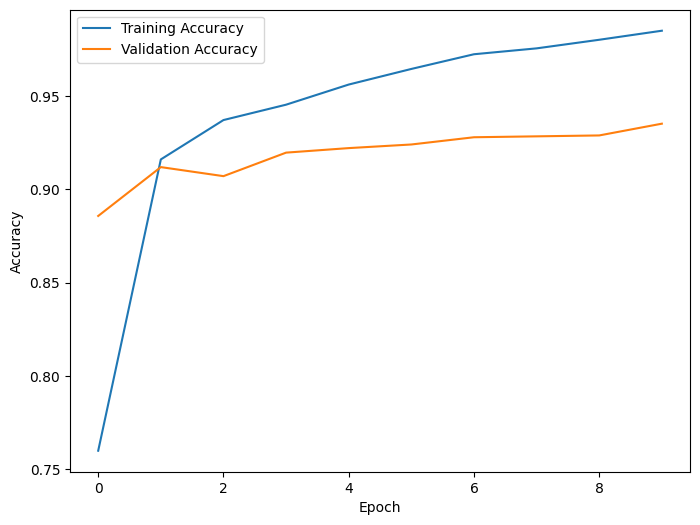

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
print(test_images.shape)


(10000, 785)


313/313 [==============================] - 1s 2ms/step


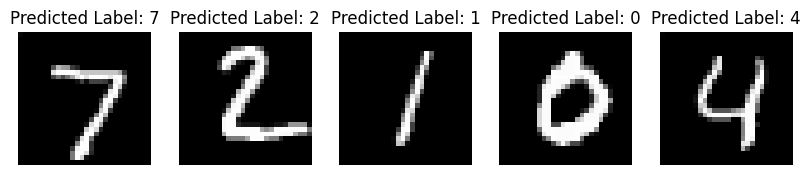

In [17]:
test_images = test_images[:, :784]
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(5, 5, i + 1)
    image = test_images[i][:784].reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted Label: {predicted_labels[i]}')
    plt.axis('off')

plt.show()
